## Loading & preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import requests
import json

In [2]:
import plotly.express as px
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
%run Preprocessing.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86371 entries, 0 to 86370
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip Id             86371 non-null  int64  
 1   Trip  Duration      86371 non-null  int64  
 2   Start Station Id    86371 non-null  int64  
 3   Start Time          86371 non-null  object 
 4   Start Station Name  86069 non-null  object 
 5   End Station Id      86058 non-null  float64
 6   End Time            86371 non-null  object 
 7   End Station Name    85759 non-null  object 
 8   Bike Id             86168 non-null  float64
 9   User Type           86371 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 85857 entries, 0 to 86370
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip Id             85857 non

In [4]:
import matplotlib.mlab as mlab
import chart_studio
from matplotlib.ticker import FuncFormatter #Call formatter function to format tick values
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) #Create image box
from matplotlib.patches import Ellipse #Draw ellipse

In [5]:
r = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

bikeshare_stations = pd.DataFrame(json.loads(r.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon']].astype({
    'station_id': 'string',
})

bikeshare_stations

,station_id,name,lat,lon
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001,Wellesley Station Green P,43.664964,-79.383550
2,7002,St. George St / Bloor St W,43.667333,-79.399429
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761
4,7004,University Ave / Elm St,43.656518,-79.389099
...,...,...,...,...
612,7686,Lower Jarvis / The Esplanade,43.647821,-79.370472
613,7687,Bloor / Gladstone - SMART,43.660202,-79.434273
614,7688,High Park Blvd / Parkside Dr,43.644887,-79.456412
615,7689,20 Eaton,43.680012,-79.344033


In [6]:
for i in range(1, 13):
    if i < 10:
        df_new = pd.read_csv("bike-share-ridership-2021-0"+ str(i) +".csv", encoding='cp1252')
    else:
        df_new = pd.read_csv("bike-share-ridership-2021-"+ str(i) +".csv", encoding='cp1252')
    
    if i == 1:
        df = df_new
    else:
        df = pd.concat([df, df_new])
df        

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,ï»¿Trip Id
0,10644218.0,1315,7021,01/01/2021 00:04,Bay St / Albert St,7164.0,01/01/2021 00:26,Gould St / Yonge St (Ryerson University),6795.0,Annual Member,NaN
1,10644220.0,396,7534,01/01/2021 00:07,Walnut Ave / Queen St W,7524.0,01/01/2021 00:13,Lisgar Park,4176.0,Casual Member,NaN
2,10644221.0,86,7162,01/01/2021 00:10,Hayter St / Laplante Ave,7006.0,01/01/2021 00:11,Bay St / College St (East Side),1814.0,Annual Member,NaN
3,10644222.0,741,7003,01/01/2021 00:10,Madison Ave / Bloor St W,7272.0,01/01/2021 00:22,Yonge St / Dundonald St - SMART,198.0,Casual Member,NaN
4,10644223.0,2073,7562,01/01/2021 00:11,Priscilla Ave / Dundas St W - SMART,7562.0,01/01/2021 00:45,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member,NaN
...,...,...,...,...,...,...,...,...,...,...,...
145844,NaN,372,7065,12/31/2021 23:56,Dundas St E / Parliament St,7472.0,01/01/2022 00:02,Dundas St E / Victoria St,3487.0,Casual Member,14805103.0
145845,NaN,762,7233,12/31/2021 23:56,King / Cowan Ave - SMART,7569.0,01/01/2022 00:08,Toronto Inukshuk Park,4195.0,Annual Member,14805104.0
145846,NaN,355,7065,12/31/2021 23:56,Dundas St E / Parliament St,7472.0,01/01/2022 00:02,Dundas St E / Victoria St,4574.0,Casual Member,14805105.0
145847,NaN,770,7292,12/31/2021 23:56,Granby St / Church St - SMART,7076.0,01/01/2022 00:09,York St / Queens Quay W,5879.0,Annual Member,14805107.0


In [7]:
df = clean(df)
df = conversion(df)

In [8]:
df = calculate(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474290 entries, 0 to 3569339
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Trip Id             float64       
 1   Trip  Duration      int64         
 2   Start Station Id    string        
 3   Start Time          datetime64[ns]
 4   Start Station Name  object        
 5   End Station Id      string        
 6   End Time            datetime64[ns]
 7   End Station Name    object        
 8   Bike Id             string        
 9   User Type           object        
 10  ï»¿Trip Id          float64       
 11  routes              string        
 12  distance            float64       
 13  avg_speed           float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), string(4)
memory usage: 397.6+ MB


- How many trips did poeple in Toronto had with Bike Share Toronto in 2021?
- Was the ridership affected by season, weather, COVID-19, festivals and holidays, etc.?
- What are the riders' behavior in terms of distance, speed, time of the day, day of the week, etc.?
- What are the most popular cycling routes? Average speed on those routes? Any changes through the season?
- Troubleshooting: which stations and bikes were frequently caught up in malfunctionings?

### How many trips did poeple in Toronto had with Bike Share Toronto in 2021?

In [11]:
byDate = df.groupby(df['Start Time'].dt.date)["Start Station Id"].count()
byDate = byDate.reset_index()
byDate

,Start Time,Start Station Id
0,2021-01-01,1715
1,2021-01-02,1807
2,2021-01-03,1845
3,2021-01-04,2854
4,2021-01-05,2624
...,...,...
360,2021-12-27,1264
361,2021-12-28,3044
362,2021-12-29,3516
363,2021-12-30,4033


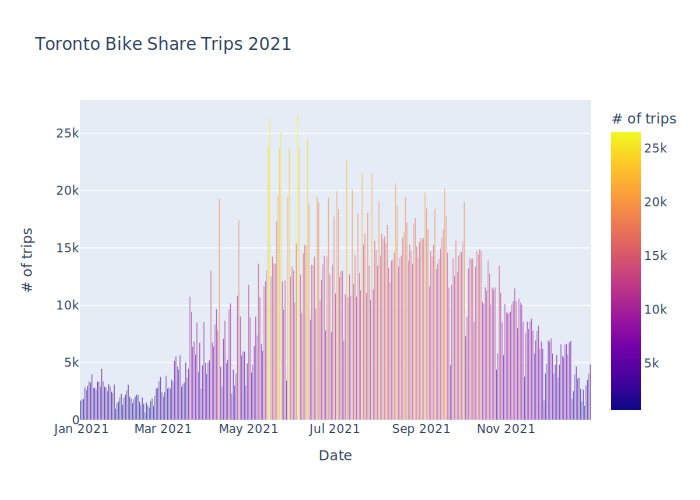

In [12]:
fig = px.bar(byDate, x='Start Time', y='Start Station Id',
             color='Start Station Id',
             labels={'Start Time':'Date', 'Start Station Id':'# of trips'}, 
             title='Toronto Bike Share Trips 2021', height=500)
#fig.show()
fig.show(renderer="svg")

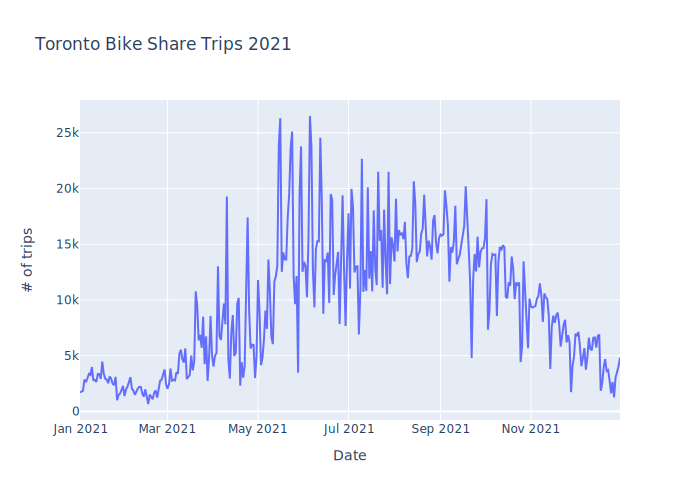

In [25]:
fig = px.line(byDate, x='Start Time', y='Start Station Id', 
              labels={'Start Time':'Date', 'Start Station Id':'# of trips'}, 
              title='Toronto Bike Share Trips 2021')
#fig.show()
fig.show(renderer="svg")

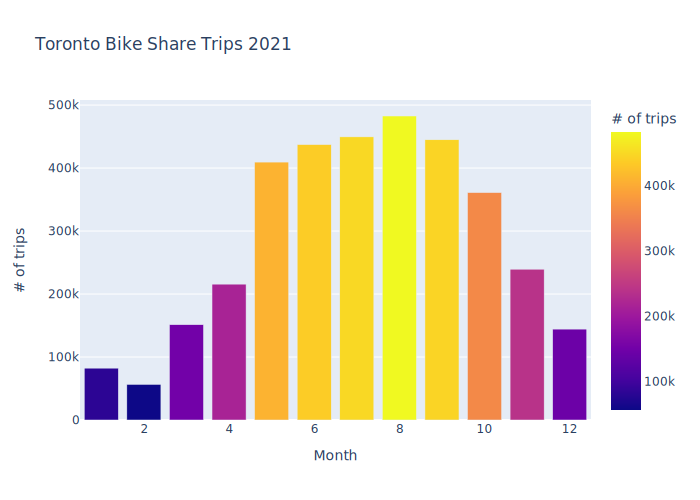

In [26]:
byMonth = df.groupby(df['Start Time'].dt.month)["Start Station Id"].count()
byMonth = byMonth.reset_index()

fig = px.bar(byMonth, x='Start Time', y='Start Station Id',
             color='Start Station Id',
             labels={'Start Time':'Month', 'Start Station Id':'# of trips'}, 
             title='Toronto Bike Share Trips 2021', height=500)
#fig.show()
fig.show(renderer="svg")

### What factors affected ridership?

The monthly ridership plot revealed the impact of weather: summer definitely is the season when more people use Share Bike Toronto

From the ridership plot by each day of 2021, we found a few outstanding "spikes" on: 05/16, 05/24, 06/05, 06/12, 07/10.

All these days seemed to be gamedays (baseball and basketball), although the baseball game didn't return to Rogers Centre until Jul 30.

In [15]:
COVID = pd.read_csv("COVID19 cases.csv")

In [17]:
COVID2021 = COVID[COVID["Reported Date"].str[:4]=="2021"]
COVID2021["Reported Date"] = pd.to_datetime(COVID2021["Reported Date"])

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_35255/727373760.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
case_by_day = COVID2021.groupby(COVID2021['Reported Date'].dt.date)["Assigned_ID"].count()
case_by_day = case_by_day.reset_index()

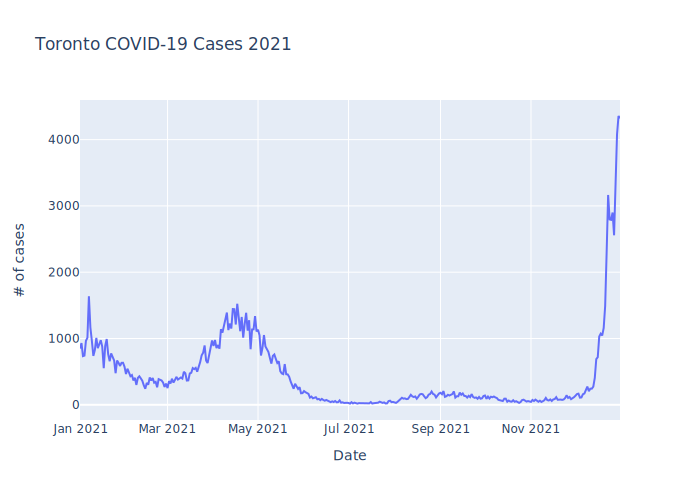

In [27]:
fig = px.line(case_by_day, x='Reported Date', y='Assigned_ID', 
              labels={'Reported Date':'Date', 'Assigned_ID':'# of cases'}, 
              title='Toronto COVID-19 Cases 2021')
#fig.show()
fig.show(renderer="svg")

### What are the riders' behavior?
in terms of distance, speed, time of the day, day of the week, etc.

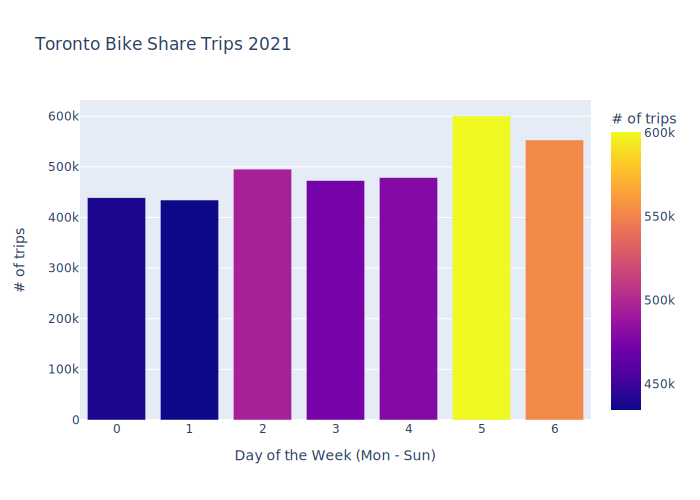

In [28]:
byWeek = df.groupby(df['Start Time'].dt.weekday)["Start Station Id"].count()
byWeek = byWeek.reset_index()

fig = px.bar(byWeek, x='Start Time', y='Start Station Id',
             color='Start Station Id',
             labels={'Start Time':'Day of the Week (Mon - Sun)', 'Start Station Id':'# of trips'}, 
             title='Toronto Bike Share Trips 2021', height=500)

#fig.show()
fig.show(renderer="svg")

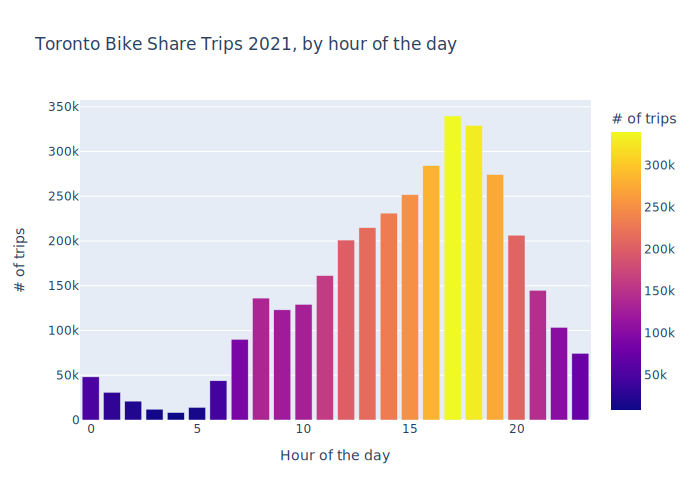

In [29]:
byHr = df.groupby(df['Start Time'].dt.hour)["Start Station Id"].count()
byHr = byHr.reset_index()

fig = px.bar(byHr, x='Start Time', y='Start Station Id',
             color='Start Station Id',
             labels={'Start Time':'Hour of the day', 'Start Station Id':'# of trips'}, 
             title='Toronto Bike Share Trips 2021, by hour of the day', height=500)
#fig.show()
fig.show(renderer="svg")

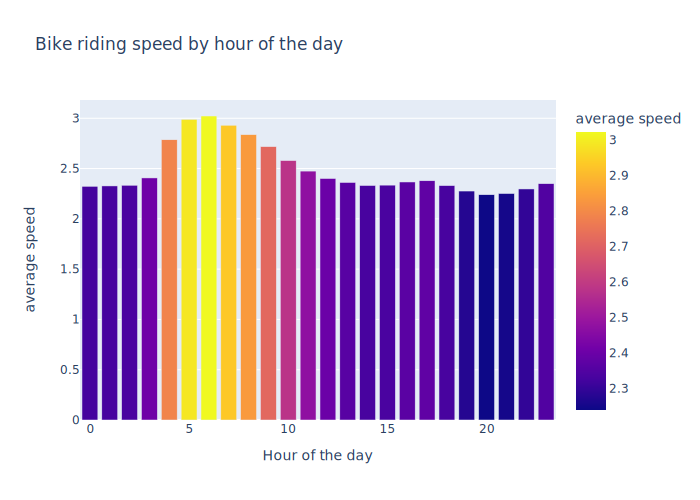

In [30]:
byHr_speed = df[df["avg_speed"] != 0].groupby(df['Start Time'].dt.hour)["avg_speed"].mean()
byHr_speed = byHr_speed.reset_index()

fig = px.bar(byHr_speed, x='Start Time', y='avg_speed',
             color='avg_speed',
             labels={'Start Time':'Hour of the day', 'avg_speed':'average speed'}, 
             title='Bike riding speed by hour of the day', height=500)
#fig.show()
fig.show(renderer="svg")

In [31]:
station = df.groupby(df['Start Station Id'])["Start Time"].count()
station = station.reset_index()
station = station.merge(bikeshare_stations, how='left', left_on='Start Station Id', right_on='station_id')

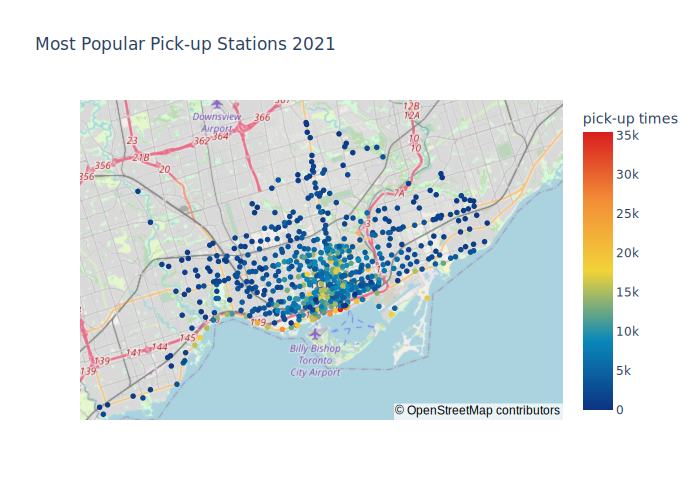

In [32]:
fig = px.scatter_mapbox(station, lat="lat", lon="lon", 
                        labels={'Start Time':'pick-up times'},
                        hover_data=["Start Time", "name"],
                        color="Start Time", color_continuous_scale=px.colors.diverging.Portland, zoom=10,
                        title='Most Popular Pick-up Stations 2021')
fig.update_layout(mapbox_style="open-street-map")
#fig.show()
fig.show(renderer="svg")